# Fully developed baroclinic instability of a 3-layer flow

In [1]:
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


# Set up

In [2]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2 
H3 = 1750.       # layer 3 

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.01         # layer 2
U3 = 0.00         # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/500.   # time-step [s]
tmax = 300*Ti      # simulation time [s]

In [3]:
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*300)

2015-10-25 21:49:12,357 - pyqg.model - INFO -  Logger initialized
2015-10-25 21:49:12,416 - pyqg.model - INFO -  Kernel initialized


# Initial condition

In [4]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

# Run the model

In [5]:
m.run()

2015-10-25 21:49:22,740 - pyqg.model - INFO -  Step: 5000, Time: 3.000000e+06, KE: 7.809761e-07, CFL: 0.002064
2015-10-25 21:49:29,866 - pyqg.model - INFO -  Step: 10000, Time: 6.000000e+06, KE: 1.294099e-05, CFL: 0.002536
2015-10-25 21:49:37,268 - pyqg.model - INFO -  Step: 15000, Time: 9.000000e+06, KE: 3.543947e-04, CFL: 0.006603
2015-10-25 21:49:44,638 - pyqg.model - INFO -  Step: 20000, Time: 1.200000e+07, KE: 3.264680e-03, CFL: 0.016581
2015-10-25 21:49:51,972 - pyqg.model - INFO -  Step: 25000, Time: 1.500000e+07, KE: 8.010529e-03, CFL: 0.026138
2015-10-25 21:49:59,509 - pyqg.model - INFO -  Step: 30000, Time: 1.800000e+07, KE: 1.684268e-02, CFL: 0.039642
2015-10-25 21:50:06,902 - pyqg.model - INFO -  Step: 35000, Time: 2.100000e+07, KE: 3.456753e-02, CFL: 0.048855
2015-10-25 21:50:14,142 - pyqg.model - INFO -  Step: 40000, Time: 2.400000e+07, KE: 7.084024e-02, CFL: 0.072394
2015-10-25 21:50:21,186 - pyqg.model - INFO -  Step: 45000, Time: 2.700000e+07, KE: 1.247350e-01, CFL: 0.

# A snapshot and some diagnostics

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


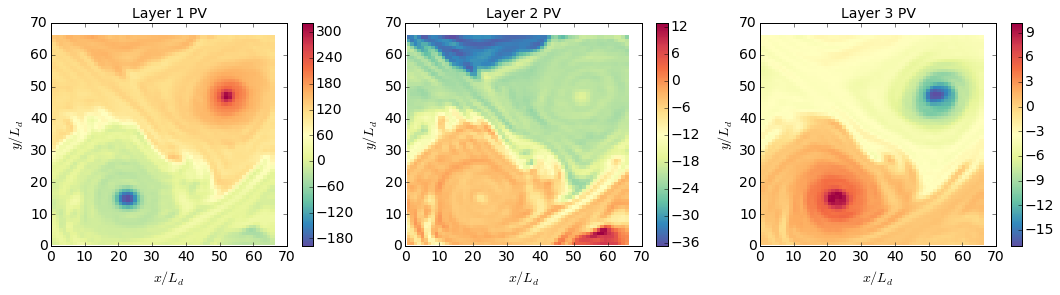

In [6]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

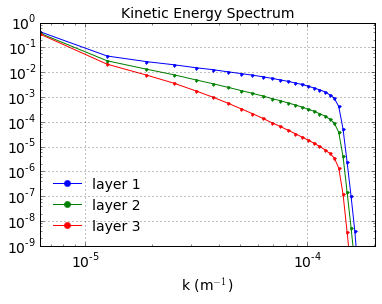

In [7]:
kespec_1 = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_2 = m.get_diagnostic('KEspec')[1].sum(axis=0)
kespec_3 = m.get_diagnostic('KEspec')[2].sum(axis=0)


plt.loglog( m.kk, kespec_1, '.-' )
plt.loglog( m.kk, kespec_2, '.-' )
plt.loglog( m.kk, kespec_3, '.-' )

plt.legend(['layer 1','layer 2', 'layer 3'], loc='lower left')
plt.ylim([1e-9,1e-0]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

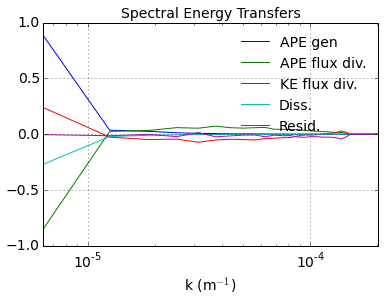

In [8]:
ebud = [ m.get_diagnostic('APEgenspec').sum(axis=0),
         m.get_diagnostic('APEflux').sum(axis=0),
         m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*(m.Hi[-1]/m.H)*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux div.','KE flux div.','Diss.','Resid.']
[plt.semilogx(m.kk, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');


The dynamics here is similar to the reference experiment of [Larichev & Held (1995)](http://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281995%29025%3C2285%3AEAAFIA%3E2.0.CO%3B2). The APE generated through baroclinic instability is fluxed towards deformation length scales, where it is converted into KE. The KE the  experiments and inverse tranfer, cascading up to the scale of the domain. The mechanical bottom drag essentially removes the large scale KE.  